In [2]:
# -*- coding: utf-8 -*-
import gensim
from gensim import corpora, similarities, models, matutils
import time
import re
import numpy as np
import pandas as pd
import logging
import html


In [4]:
import pyLDAvis.gensim

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from matplotlib import rcParams

In [5]:
from datetime import datetime, date, time
from dateutil.parser import parse
import dateutil

In [6]:
dictionaryMonth = {'января' : 'January', 'февраля' : 'February', 'марта' : 'March', \
             'апреля' : 'April', 'мая' : 'May', 'июня' : 'June', 'июля' : 'July', 'августа' : 'August', 'сентября' : 'September', 'октября' : 'October', \
             'ноября': 'November', u'декабря' : 'December'}

In [7]:
df=pd.read_pickle('data/dfWiki_2.pkl')

In [8]:
df.head()

,id,title,autor,text,data,cat,text2,noun,text3
1349,1349,россия удивлена заявлениями премьер-министра у...,Krassotkin,{{:дата|3 ноября 2005}} {{украина}}в [[w:ru:мо...,3 ноября 2005,"россия, украина, политика, вто, юрий ехануров,...",украинав обратили внимание на сообщения о в...,"[россия, премьерминистр, украина, разъяснение,...","[россия, заявлениями, премьерминистра, украины..."
1353,1353,впервые зарегистрирован свет самых древних звезд,Krassotkin,{{дата|3 ноября 2005}}{{астрономия}}[[:w:спитц...,3 ноября 2005,"опубликовано, спитцер, nasa, вселенная, nature","астрономия, предположительно, зарегистрировал ...","[свет, звезда, астрономия, свет, звезда, звезд...","[зарегистрирован, свет, древних, звезд, астрон..."
1359,1359,день народного единства,Krassotkin,{{дата|4 ноября 2005}}в россии первый раз праз...,4 ноября 2005,"россия, день народного единства, праздники",в россии первый раз празднуют «день народного ...,"[день, год, год, войско, князь]","[день, единства, россии, раз, день, единства, ..."
1361,1361,беспорядки в париже,Krassotkin,{{дата|5 ноября 2005}} {{франция}}[[изображени...,5 ноября 2005,"франция, гражданские беспорядки, париж, страсб...","францияв , уже больше недели, продолжаются ма...","[беспорядок, беспорядок, молодая, человек, гор...","[беспорядки, париже, францияв, недели, массовы..."
1381,1381,парламентские выборы в азербайджане,Artem Korzhimanov,{{дата|6 ноября 2005}}{{азербайджан}}6 ноября ...,6 ноября 2005,политика,азербайджан6 ноября 2005 года в состоялись па...,"[азербайджан, ноябрь, выбор, данные, большинст...","[выборы, азербайджане, азербайджан, ноября, го..."


In [9]:
dY=[]
i=0
maxI=3
for dd in df['data'].tolist():
    #print (dd)
    for russian,english in dictionaryMonth.items():
        dd=(dd.replace(russian,english)).strip()
    #print (dd)
    i+=1
    if i%500==0:
        print (dd)
    #print (dateutil.parser.parse(dd).date())
    try:
        d01=str(dateutil.parser.parse(dd).year)+"-"+str(dateutil.parser.parse(dd).month)+"-01"
        
        #print (d01)
    except:
        d01='0000-01-01'
        #print (dd)
        #break
    dY.append(d01)
    #dY.append(str(dateutil.parser.parse(dd).year)+"-"+str(dateutil.parser.parse(dd).month)+"-"+str(dateutil.parser.parse(dd).day))
    #print (dd)
print (len(dY))


28 October 2008
11 October 2010
2 February 2011
14 August 2011

5 March 2012
9 October 2012
4 January 2013
21 February 2013
30 April 2013
24 July 2013
15 January 2014
1 April 2014
22 June 2014
28 August 2014
22 January 2015


20 February 2016
27 April 2016
5 August 2016
27 September 2016

12112


In [10]:
df['year']=dY
df.head()

,id,title,autor,text,data,cat,text2,noun,text3,year
1349,1349,россия удивлена заявлениями премьер-министра у...,Krassotkin,{{:дата|3 ноября 2005}} {{украина}}в [[w:ru:мо...,3 ноября 2005,"россия, украина, политика, вто, юрий ехануров,...",украинав обратили внимание на сообщения о в...,"[россия, премьерминистр, украина, разъяснение,...","[россия, заявлениями, премьерминистра, украины...",2005-11-01
1353,1353,впервые зарегистрирован свет самых древних звезд,Krassotkin,{{дата|3 ноября 2005}}{{астрономия}}[[:w:спитц...,3 ноября 2005,"опубликовано, спитцер, nasa, вселенная, nature","астрономия, предположительно, зарегистрировал ...","[свет, звезда, астрономия, свет, звезда, звезд...","[зарегистрирован, свет, древних, звезд, астрон...",2005-11-01
1359,1359,день народного единства,Krassotkin,{{дата|4 ноября 2005}}в россии первый раз праз...,4 ноября 2005,"россия, день народного единства, праздники",в россии первый раз празднуют «день народного ...,"[день, год, год, войско, князь]","[день, единства, россии, раз, день, единства, ...",2005-11-01
1361,1361,беспорядки в париже,Krassotkin,{{дата|5 ноября 2005}} {{франция}}[[изображени...,5 ноября 2005,"франция, гражданские беспорядки, париж, страсб...","францияв , уже больше недели, продолжаются ма...","[беспорядок, беспорядок, молодая, человек, гор...","[беспорядки, париже, францияв, недели, массовы...",2005-11-01
1381,1381,парламентские выборы в азербайджане,Artem Korzhimanov,{{дата|6 ноября 2005}}{{азербайджан}}6 ноября ...,6 ноября 2005,политика,азербайджан6 ноября 2005 года в состоялись па...,"[азербайджан, ноябрь, выбор, данные, большинст...","[выборы, азербайджане, азербайджан, ноября, го...",2005-11-01


In [11]:
df2=df[df['year']!='0000-01-01']

In [12]:
len(df2)

10748

In [13]:
df2.to_csv('data/WikiNews.csv')

In [12]:
df.to_csv('data/FullWikiNews.csv')

In [14]:
df2.to_pickle('data/WikiData_dat_5.pkl')

In [14]:
contentWiki=df2['noun']

In [15]:
%%time
##Saving of the dictionary and corpus is done here
##final_text contains the tokens of all the documents

dictionary = corpora.Dictionary(contentWiki)
dictionary.save('data-tm/query.dict');
corpus = [dictionary.doc2bow(text) for text in contentWiki]
corpora.MmCorpus.serialize('data-tm/query.mm', corpus)
corpora.SvmLightCorpus.serialize('data-tm/query.svmlight', corpus)
corpora.BleiCorpus.serialize('data-tm/query.lda-c', corpus)
corpora.LowCorpus.serialize('data-tm/query.low', corpus)

Wall time: 4.86 s


In [16]:
%%time
lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=30, alpha='auto', eval_every=5)

Wall time: 44.5 s


In [17]:
lda.show_topics(2)

[(17,
  '0.018*"искусство" + 0.011*"театр" + 0.008*"кинотаврикjpgцеремония" + 0.007*"год" + 0.006*"директор" + 0.005*"игорь" + 0.005*"альбом" + 0.005*"артист" + 0.005*"александр" + 0.005*"иван"'),
 (23,
  '0.015*"человек" + 0.015*"россия" + 0.011*"вопрос" + 0.008*"ребёнок" + 0.007*"власть" + 0.007*"время" + 0.006*"страна" + 0.006*"владимир" + 0.006*"работа" + 0.006*"дело"')]

In [18]:
lda.get_term_topics('год')

[(2, 0.017349286423102871),
 (4, 0.010591194130098666),
 (7, 0.024761471914486549),
 (8, 0.015145587043314201),
 (9, 0.017337064205942814),
 (13, 0.047512692254391323),
 (18, 0.013680051929075256),
 (22, 0.013347357645431305)]

In [19]:
len (dictionary)

91791

In [20]:
for ll in lda.get_topic_terms(20):
    print (ll[0], dictionary[ll[0]], ll[1])

38078 трамп 0.0188741029478
6630 обама 0.0117136350452
444 европа 0.00775121753365
3279 исландия 0.00749966657461
80 место 0.00738122392072
145 мир 0.00735250048101
222 игра 0.00634367180731
161 сша 0.00603894907468
38 год 0.0059592746725
3375 колумбия 0.00580708768161


In [21]:
followers_data =  pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(followers_data)

In [22]:
import re

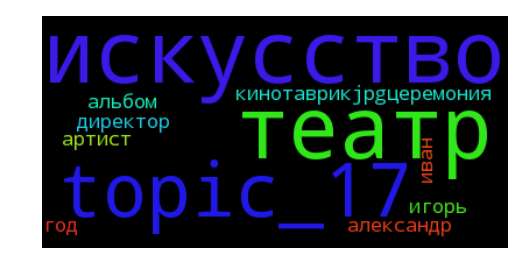

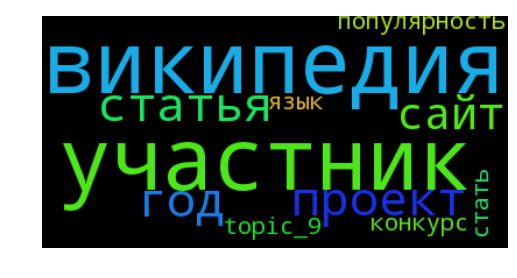

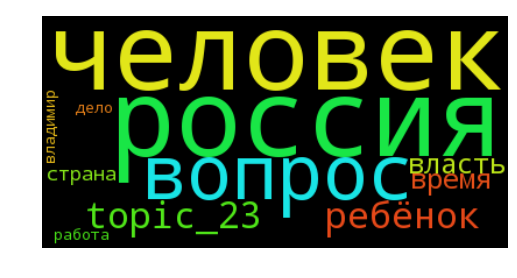

In [23]:
curr_topic = 0
for l in lda.print_topics(3):
    line = l[1]
    scores = [float(x.split("*")[0]) for x in line.split(" + ")]
    words = [re.sub('\"', '', x.split("*")[1]) for x in line.split(" + ")]
    freqs = []
    for word, score in zip(words, scores):
        freqs.append((word, score))
    topicN='topic_' + str(l[0])
    freqs.append((topicN, 0.01))    
    elements = WordCloud().generate_from_frequencies((freqs))
    rcParams['figure.figsize'] = 6, 4
    plt.imshow(elements)
    plt.axis("off")
    plt.show()
    curr_topic += 1
    

In [24]:
df2.head()

,id,title,autor,text,data,cat,text2,noun,text3,year
1349,1349,россия удивлена заявлениями премьер-министра у...,Krassotkin,{{:дата|3 ноября 2005}} {{украина}}в [[w:ru:мо...,3 ноября 2005,"россия, украина, политика, вто, юрий ехануров,...",украинав обратили внимание на сообщения о в...,"[россия, премьерминистр, украина, разъяснение,...","[россия, заявлениями, премьерминистра, украины...",2005-11-01
1353,1353,впервые зарегистрирован свет самых древних звезд,Krassotkin,{{дата|3 ноября 2005}}{{астрономия}}[[:w:спитц...,3 ноября 2005,"опубликовано, спитцер, nasa, вселенная, nature","астрономия, предположительно, зарегистрировал ...","[свет, звезда, астрономия, свет, звезда, звезд...","[зарегистрирован, свет, древних, звезд, астрон...",2005-11-01
1359,1359,день народного единства,Krassotkin,{{дата|4 ноября 2005}}в россии первый раз праз...,4 ноября 2005,"россия, день народного единства, праздники",в россии первый раз празднуют «день народного ...,"[день, год, год, войско, князь]","[день, единства, россии, раз, день, единства, ...",2005-11-01
1361,1361,беспорядки в париже,Krassotkin,{{дата|5 ноября 2005}} {{франция}}[[изображени...,5 ноября 2005,"франция, гражданские беспорядки, париж, страсб...","францияв , уже больше недели, продолжаются ма...","[беспорядок, беспорядок, молодая, человек, гор...","[беспорядки, париже, францияв, недели, массовы...",2005-11-01
1381,1381,парламентские выборы в азербайджане,Artem Korzhimanov,{{дата|6 ноября 2005}}{{азербайджан}}6 ноября ...,6 ноября 2005,политика,азербайджан6 ноября 2005 года в состоялись па...,"[азербайджан, ноябрь, выбор, данные, большинст...","[выборы, азербайджане, азербайджан, ноября, го...",2005-11-01


In [25]:
len(df2)

10748

In [26]:
dfVal=pd.DataFrame(columns=('year', 'topic', 'val'))

In [59]:
%%time
i=0
for doc in corpus:
    i+=1
    if i==len(df2):
        break
    d=df2['year'].iloc[i]
    vec=lda.get_document_topics(doc)
    for r in lda.get_document_topics(doc):
        rowt=dict(zip(['year', 'topic', 'val'], [d, r[0], r[1]]))
        row_st = pd.Series(rowt)
        row_st.name=i
        dfVal = dfVal.append(row_st)
    if i%1000==0:
        print (i)
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Wall time: 7min


In [60]:
dfVal.head()

,year,topic,val
7415,2016-11-01,4.0,0.035439
7415,2016-11-01,7.0,0.027925
7415,2016-11-01,10.0,0.297856
7415,2016-11-01,12.0,0.148978
7415,2016-11-01,14.0,0.313172


In [61]:
dfVal_2=dfVal.copy()
dfVal=dfVal[dfVal['year']>='2014-01-01']
len(dfVal)

39236

In [62]:
dfVal_Y=pd.DataFrame(columns=('year', 'topic', 'val'))

In [63]:
%%time
i=0
#maxI=20
for name, groupe in dfVal.groupby(['year', 'topic']):
    #print , , 
    rowt=dict(zip(['year', 'topic', 'val'], [name[0], int(name[1]), groupe['val'].sum()]))
    row_st = pd.Series(rowt)
    row_st.name=i
    dfVal_Y = dfVal_Y.append(row_st)
    i+=1
    if i%1000==0:
        print (i)
dfVal_Y['year'] = pd.to_datetime(dfVal_Y['year'])

1000
Wall time: 2.69 s


In [64]:
normVal=[]
i=0
#maxI=3
for dat in dfVal_Y.iterrows():
    #if dat[1]['year']==2005.0:
    #    print (dat[1]['year'])
    #print (dfVal_Y[dfVal_Y['year']==dat[1]['year']].sum()['val'])
    val_n=dat[1]['val']/dfVal_Y[dfVal_Y['year']==dat[1]['year']].sum()['val']
    #print (dat[1]['topic'], dat[1]['val'], dfVal_Y[dfVal_Y['year']==dat[1]['year']].sum(), val_n)
    #print (val_n)
    normVal.append(val_n)
    i+=1
    #if i > maxI:
    #    break
    if i%1000==0:
        print (i)

1000


In [65]:
dfVal_Y['valY']=normVal

In [66]:
dfVal_Y.head(6)

,year,topic,val,valY
0,2014-01-01,0.0,7.653247,0.037676
1,2014-01-01,1.0,4.696967,0.023123
2,2014-01-01,2.0,6.393489,0.031475
3,2014-01-01,3.0,2.777213,0.013672
4,2014-01-01,4.0,7.529669,0.037068
5,2014-01-01,5.0,3.031191,0.014922


In [67]:
topic_year_notnormal=dfVal_Y.pivot(index='topic', columns='year', values='val')
topic_year_notnormal.fillna(0, inplace=True)
t_y_nn=topic_year_notnormal.transpose()
topic_year=dfVal_Y.pivot(index='topic', columns='year', values='valY')
topic_year.fillna(0, inplace=True)
topic_year.head()

year,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,...,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00
topic,,,,,,,,,,,,,,,,,,,,,
0.0,0.037676,0.038850,0.060116,0.046072,0.046777,0.043051,0.046053,0.048858,0.027109,0.004725,...,0.059692,0.056387,0.043182,0.037235,0.068847,0.042971,0.057034,0.064172,0.046076,0.042226
1.0,0.023123,0.098117,0.036379,0.011125,0.042698,0.354110,0.205945,0.047554,0.033200,0.062982,...,0.023422,0.006697,0.037467,0.323744,0.080714,0.143441,0.024205,0.035963,0.026756,0.031642
2.0,0.031475,0.020769,0.013612,0.026158,0.022387,0.011032,0.026885,0.023564,0.003313,0.004312,...,0.041087,0.028522,0.025216,0.032013,0.047759,0.021005,0.033446,0.027971,0.016312,0.021739
3.0,0.013672,0.023118,0.057723,0.052397,0.052260,0.034199,0.046770,0.034778,0.024010,0.017447,...,0.048162,0.057067,0.046278,0.031047,0.080850,0.040682,0.059601,0.035512,0.028529,0.053581
4.0,0.037068,0.019863,0.015299,0.014585,0.024330,0.008640,0.018553,0.028172,0.040574,0.005757,...,0.033531,0.034345,0.022434,0.020766,0.029551,0.024428,0.026130,0.030336,0.026484,0.022276


In [68]:
t_y=topic_year.transpose()

In [69]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
                 '#800080', '#FF00FF', '#000080', '#0000FF', '#008080',
                  '#00FFFF', '#008000', '#00FF00', '#808000', '#FFFF00',
                  '#800000', '#FF0000', '#000000', '#808080', '#C0C0C0',
                  '#FFFFFF', '#B22222', '#F08080', '#FF69B4', '#FF7F50',
                  '#FFFF00',
                  '#BDB76B', '#BC8F8F', '#8B4513', '#00008B', '#FFE4E1',
                  '#008080',
                  '#00CED1', '#00CED1']

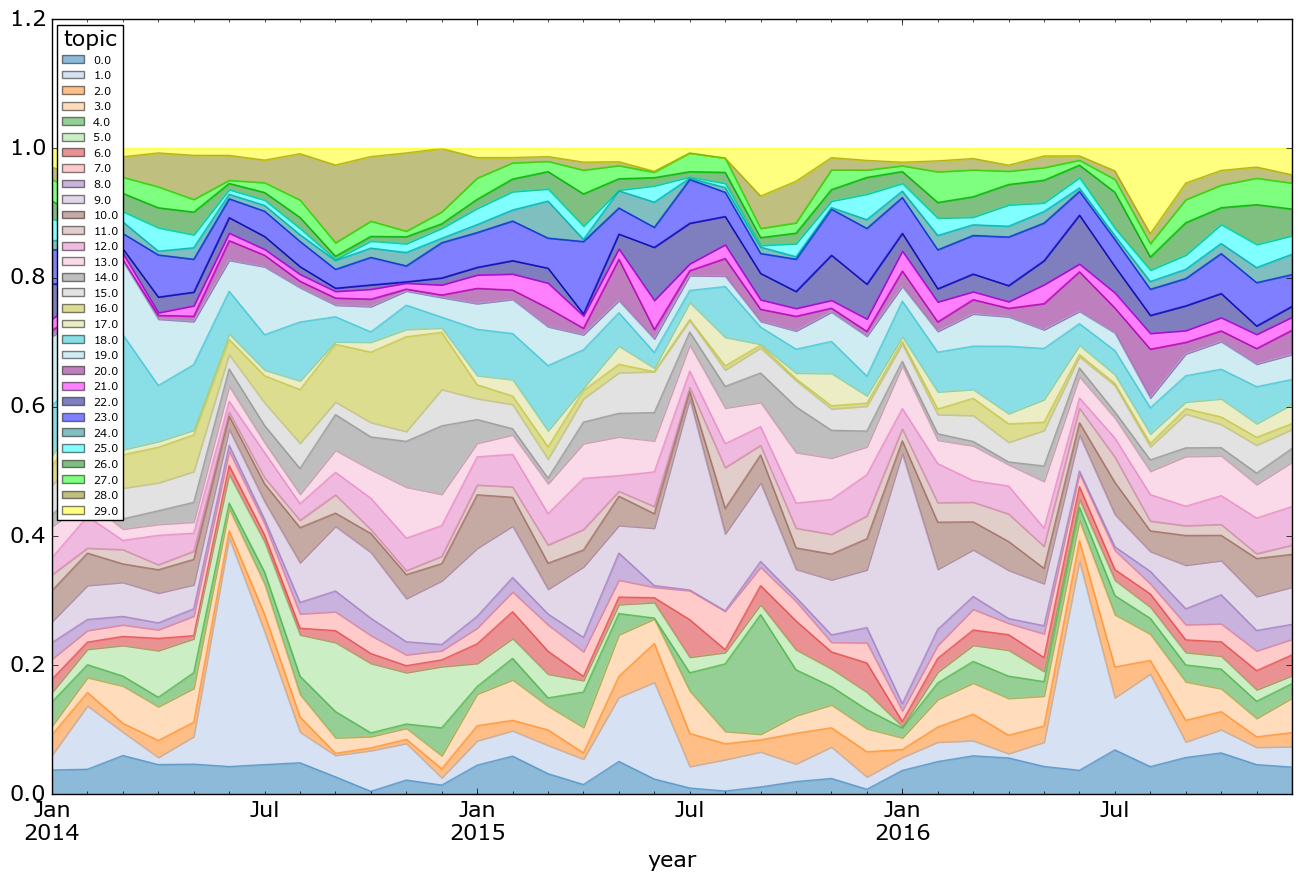

In [70]:

rcParams['font.family'] = 'Verdana'
rcParams['font.size'] = 16
rcParams['legend.fontsize'] = 8
rcParams['figure.figsize'] = 16, 10
rcParams['legend.frameon'] = True
#labels = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
#plt.axis([0, 6, 0, 20])
#plt.xticks(labels)
t_y.plot.area(alpha=0.5, color=color_sequence)
plt.show()

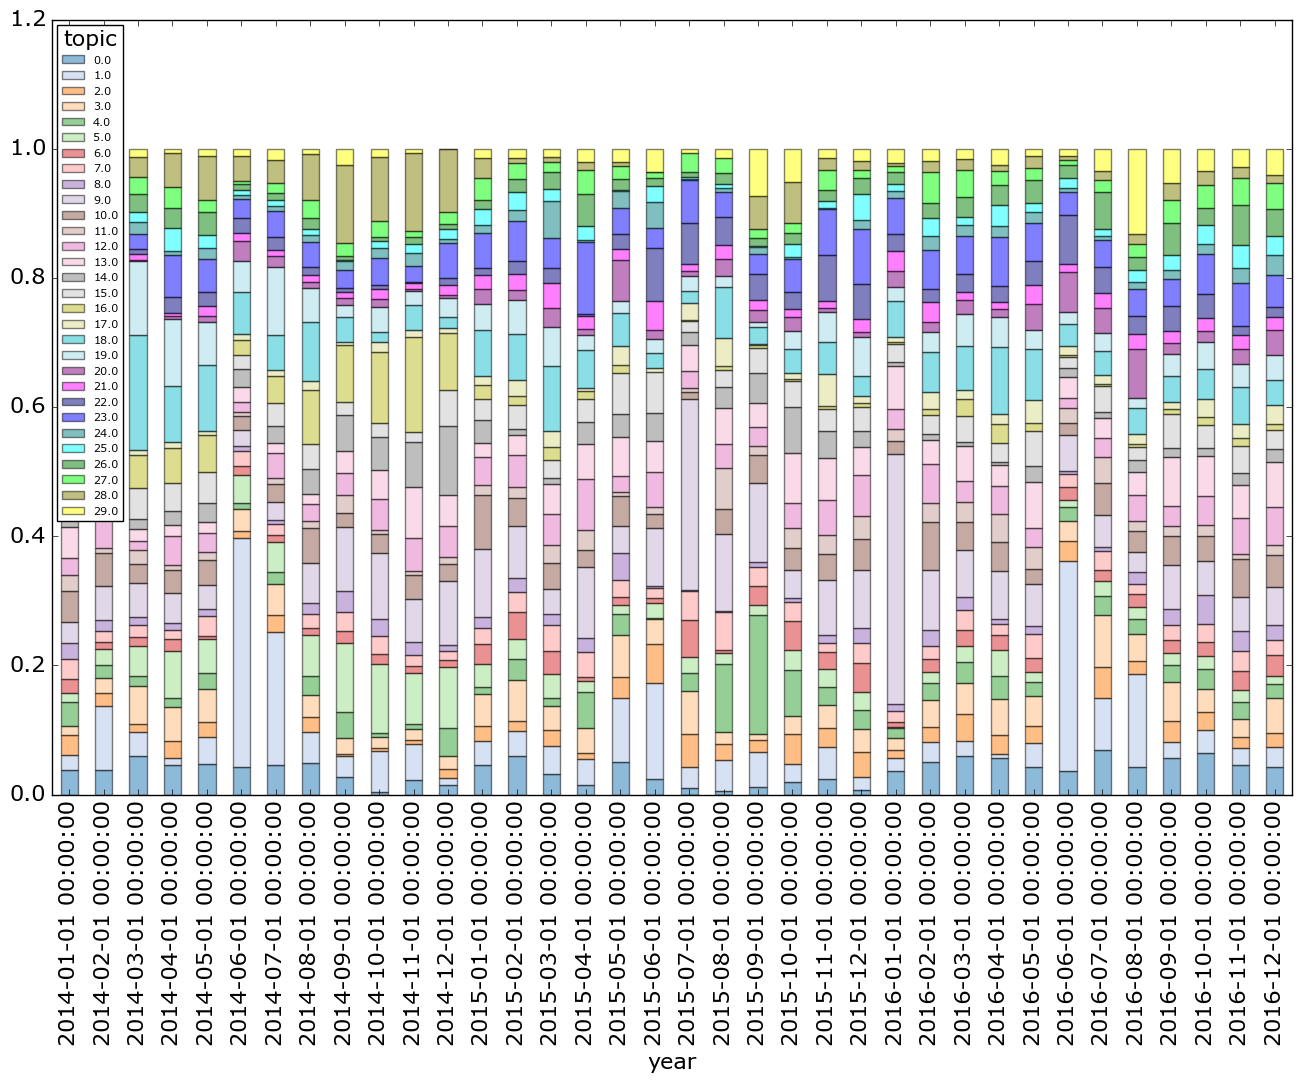

In [71]:
t_y.plot.bar(stacked=True, alpha=0.5, color=color_sequence)
plt.show()

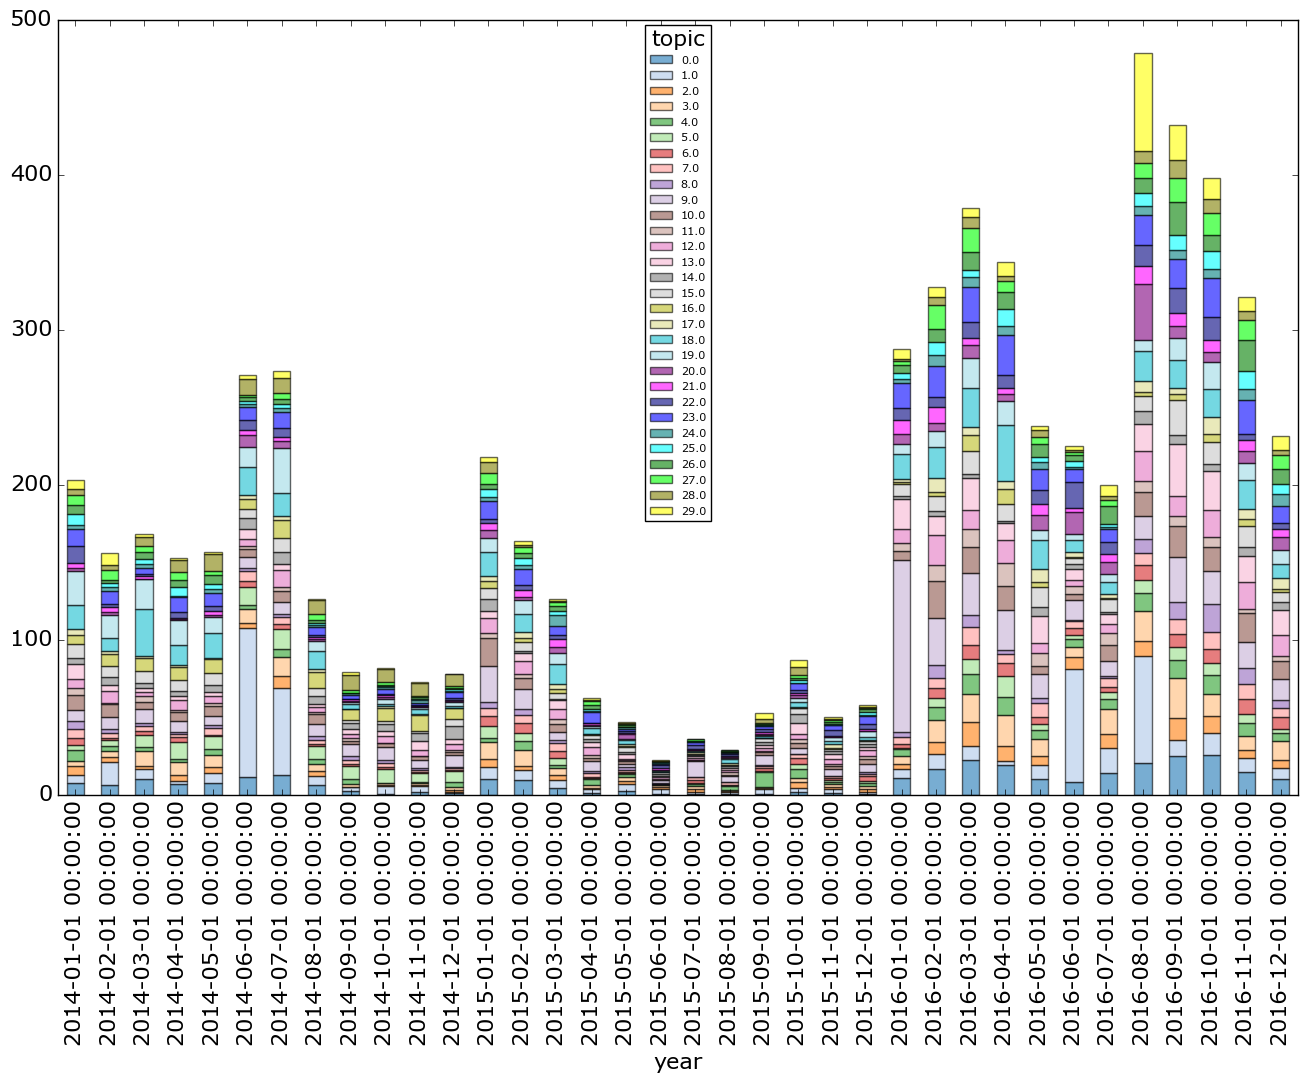

In [72]:

t_y_nn.plot.bar(stacked=True, alpha=0.6, color=color_sequence)
plt.show()

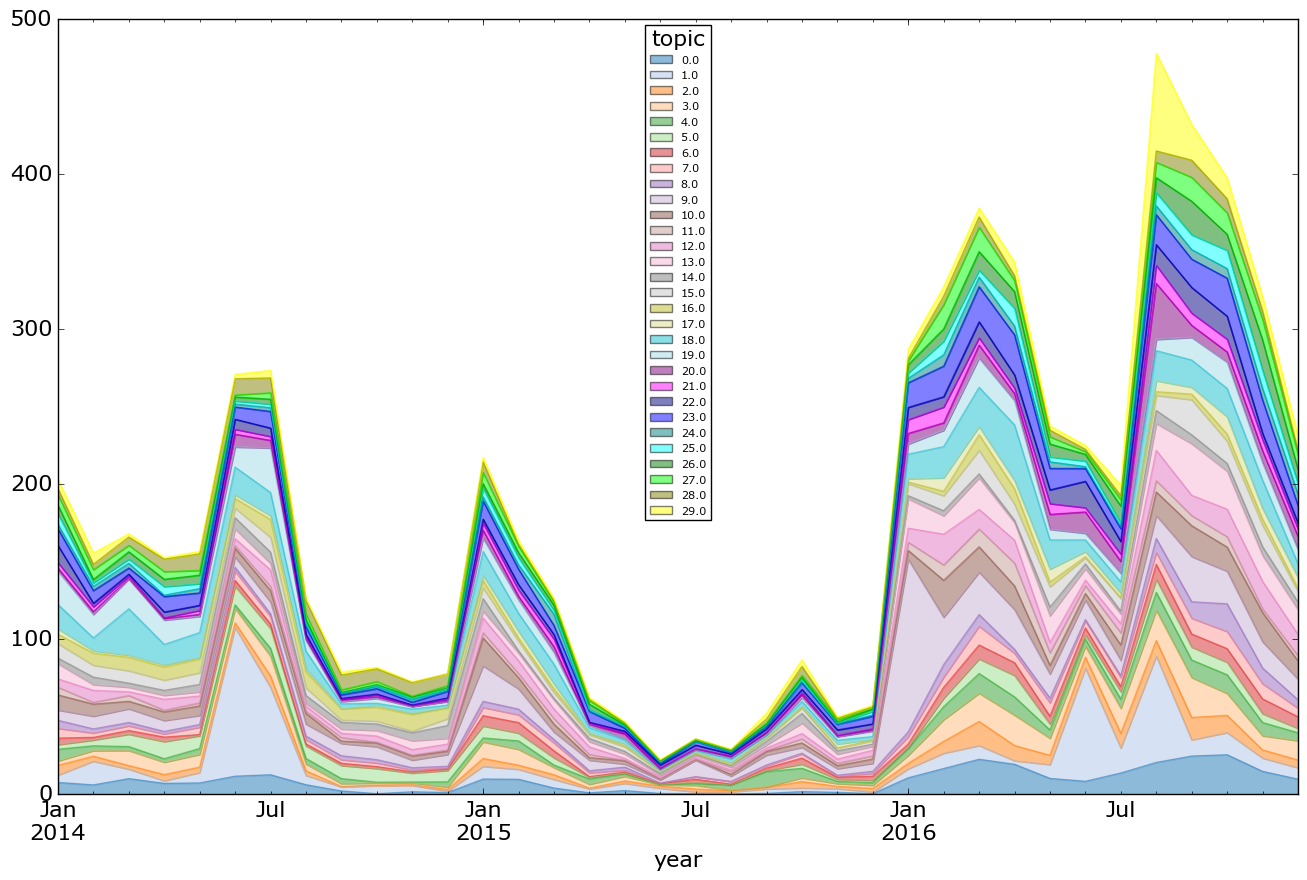

In [73]:

rcParams['font.family'] = 'Verdana'
rcParams['font.size'] = 16
rcParams['legend.fontsize'] = 8
rcParams['figure.figsize'] = 16, 10
rcParams['legend.frameon'] = True
#labels = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
#plt.axis([0, 6, 0, 20])
#plt.xticks(labels)
t_y_nn.plot.area(alpha=0.5, color=color_sequence)
plt.show()

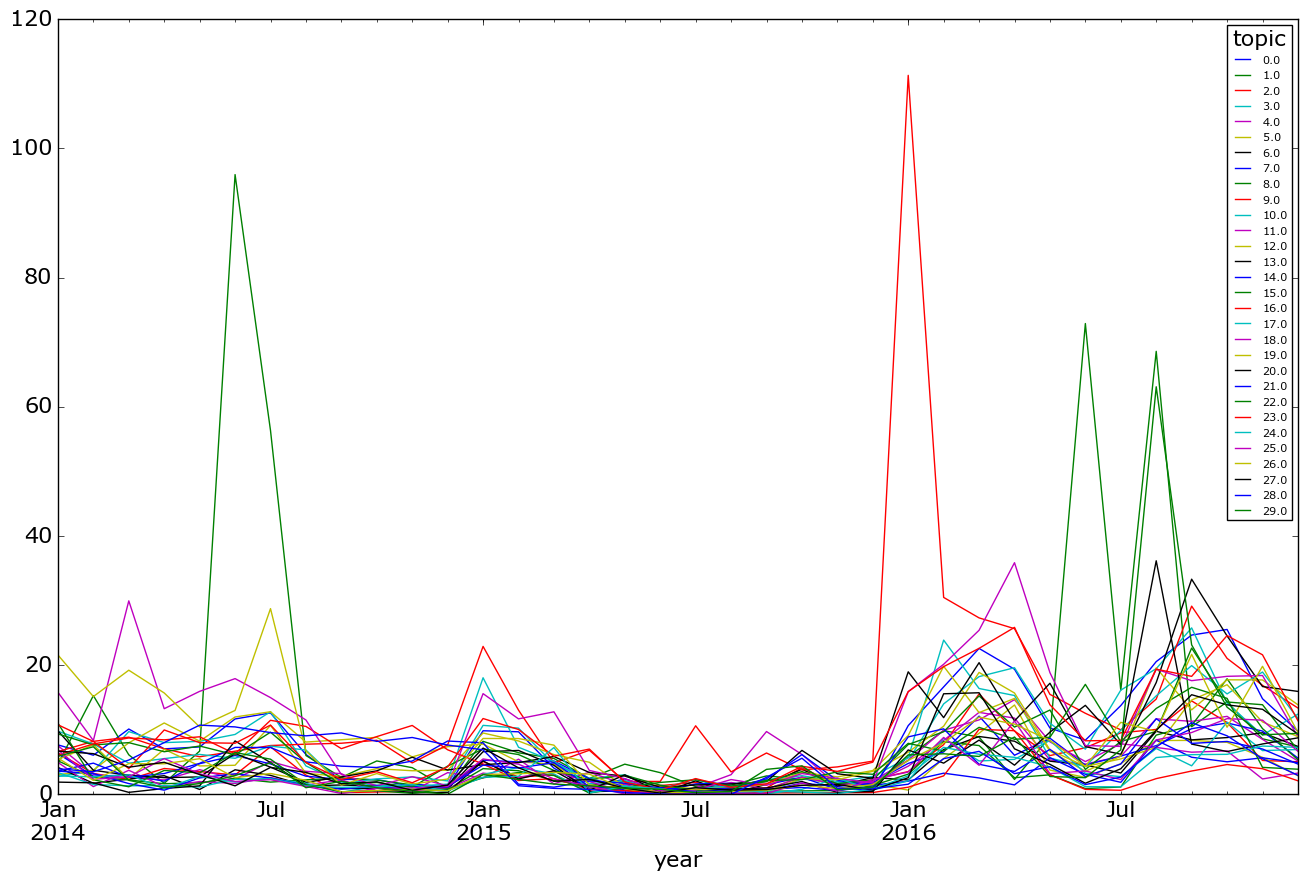

In [74]:
t_y_nn.plot()
plt.show()